# Dealing With Missing Values in Python – A Complete Guide

This article was published as a part of the Data Science Blogathon   

# Introduction
Data Cleaning is the process of finding and correcting the inaccurate/incorrect data that are present in the dataset. One such process needed is to do something about the values that are missing in the dataset. In real life, many datasets will have many missing values, so dealing with them is an important step.

**Why do you need to fill in the missing data?** Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

For filling missing values, there are many methods available. For choosing the best method, you need to understand the type of missing value and its significance, before you start filling/deleting the data.

# First Look at the Dataset
In this article, I will be working with the Titanic Dataset from Kaggle.

For downloading the dataset, use the following link – https://www.kaggle.com/c/titanic

- Import the required libraries that you will be using – numpy and pandas.

In [2]:
import pandas as pd
import numpy as np
#importing the dataset into kaggle
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


See that the contains many columns like PassengerId, Name, Age, etc.. We won’t be working with all the columns in the dataset, so I am going to be deleting the columns I don’t need.

In [3]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

See that there are also categorical values in the dataset, for this, you need to use Label Encoding or One Hot Encoding.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf=df
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


# How to know whether the data has missing values?
Missing values are usually represented in the form of Nan or null or None in the dataset.

df.info() the function can be used to give information about the dataset. This will provide you with the column names along with the number of non – null values in each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


See that there are null values in the column **Age**.

The second way of finding whether we have null values in the data is by using the **isnull()** function.

In [12]:
print(df.isnull().sum())

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


See that all the null values in the dataset are in the column – **Age**.

Let’s try fitting the data using logistic regression.

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

See that the logistic regression model does not work as we have NaN values in the dataset. Only some of the machine learning algorithms can work with missing data like KNN, which will ignore the values with Nan values.

Now let’s look at the different methods that you can use to deal with the missing data.

The methods I will be discussing are

1. Deleting the columns with missing data
2. Deleting the rows with missing data
3. Filling the missing data with a value – Imputation
4. Imputation with an additional column


# 1. Deleting the column with missing data

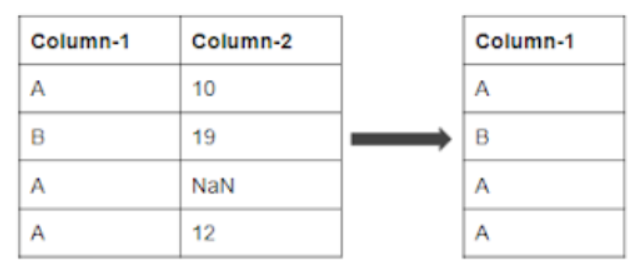

In this case, let’s delete the column, **Age** and then fit the model and check for accuracy.

But this is an extreme case and should only be used when there are many null values in the column.

In [17]:
updated_df = df.dropna(axis=1)


In [18]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7686567164179104


See that we are able to achieve an accuracy of 76.8%.

The problem with this method is that we may lose valuable information on that feature, as we have deleted it completely due to some null values.

Should only be used if there are too many null values.

# 2. Deleting the row with missing data

If there is a certain row with missing data, then you can delete the entire row with all the features in that row.

axis=1 is used to drop the column with `NaN` values.

axis=0 is used to drop the row with `NaN` values.

In [22]:
import pandas as pd
import numpy as np
#importing the dataset into kaggle
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf=df


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [10]:
newdf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [14]:
df.dropna(subset = ["Age"], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [27]:
y = df['Survived']
df.drop("Survived",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 36.3 KB


In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.8232558139534883


In this case, see that we are able to achieve better accuracy than before. This is maybe because the column Age contains more valuable information than we expected.

# 3. Filling the Missing Values – Imputation


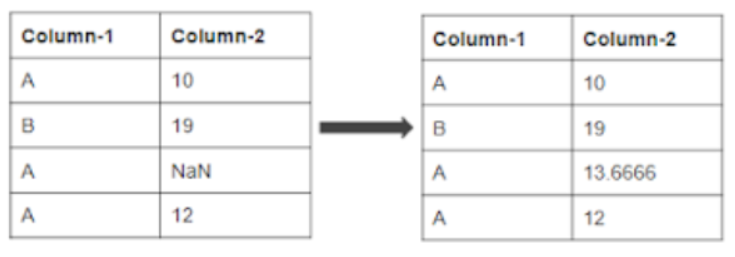

In this case, we will be filling the missing values with a certain number.

The possible ways to do this are:

1. Filling the missing data with the mean or median value if it’s a numerical variable.
2. Filling the missing data with mode if it’s a categorical value.
3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
4. Filling the categorical value with a new type for the missing values.


You can use the fillna() function to fill the null values in the dataset.

In [34]:
import pandas as pd
import numpy as np
#importing the dataset into kaggle
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf=df

In [37]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [38]:
y = df['Survived']
df.drop("Survived",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [39]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7873134328358209


The accuracy value comes out to be 78.7% which is a reduction over the previous case.

This will not happen in general, in this case, it means that the mean has not filled the null value properly.